# وَأَن لَّيْسَ لِلْإِنسَانِ إِلَّا مَا سَعَىٰ (39) وَأَنَّ سَعْيَهُ سَوْفَ يُرَىٰ (40) ثُمَّ يُجْزَاهُ الْجَزَاءَ الْأَوْفَىٰ

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Dataset path:", path)

for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        csv_path = os.path.join(path, file_name)
        print("Found CSV file:", file_name)
        break  

file = pd.read_csv(csv_path)

Dataset path: C:\Users\User.DESKTOP-OQ6NE4T\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1
Found CSV file: Titanic-Dataset.csv


In [3]:
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Skwed ,false values and Outliers in [Age , Fare]

In [6]:
file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Nulls ->>columns [Age , Cabin , Embarked] 

In [7]:
file.duplicated().sum()

0

In [8]:
file.drop(columns=['Name','PassengerId'],inplace=True)

In [9]:
object_list=[]
numerical_list=[]
for col in file.columns:
    if (file[col].dtype not in ['int64','float64']):
        object_list.append(col)
    else:
        numerical_list.append(col)    

## ---------------------------------------------------------------------------------------------------------------
## ------------------------------------------**beginning Of EDA**------------------------------------------------
## ---------------------------------------------------------------------------------------------------------------

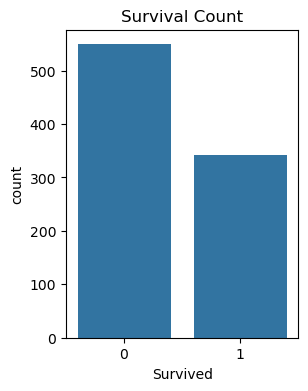

In [10]:
plt.figure(figsize=(3,4))
sns.countplot(x='Survived',data=file)
plt.title('Survival Count')
plt.show()

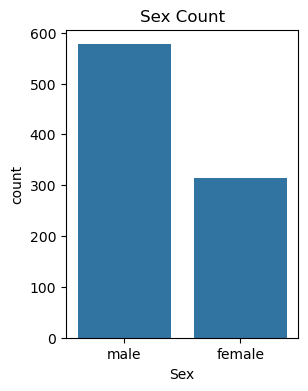

In [11]:
plt.figure(figsize=(3,4))
sns.countplot(x='Sex',data=file)
plt.title('Sex Count')
plt.show()

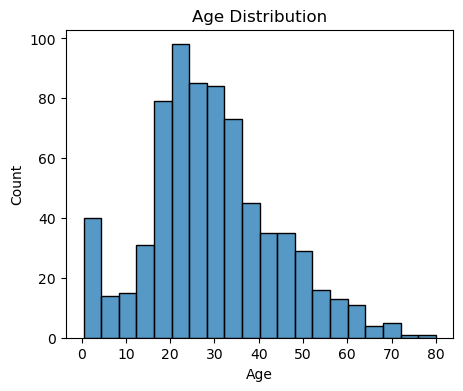

In [12]:
plt.figure(figsize=(5,4))
sns.histplot(x='Age',data=file)
plt.title('Age Distribution')
plt.show()

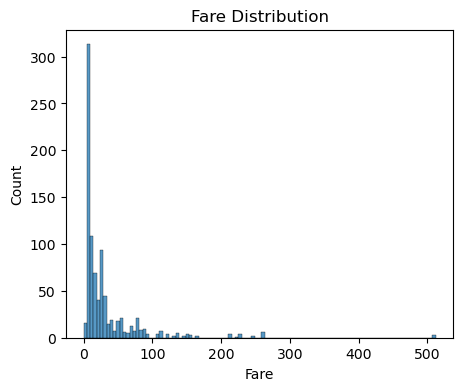

In [13]:
plt.figure(figsize=(5,4))
sns.histplot(x='Fare',data=file)
plt.title('Fare Distribution')
plt.show()

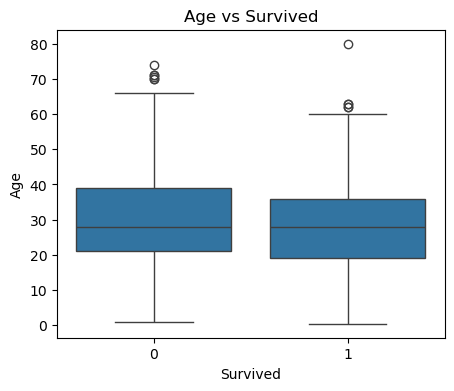

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Survived',y='Age',data=file)
plt.title('Age vs Survived')
plt.show()

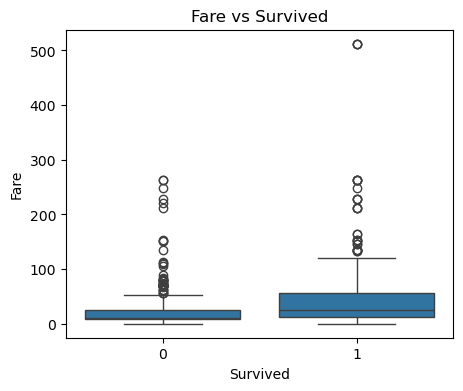

In [15]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Survived',y='Fare',data=file)
plt.title('Fare vs Survived')
plt.show()

**Conclusion:**

There is a clear direct relationship between fare and survival:
The higher the fare, the greater the likelihood of survival.

In [16]:
Pclass_with_Survived=file.groupby('Pclass')['Survived'].sum()
Pclass_with_Survived

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

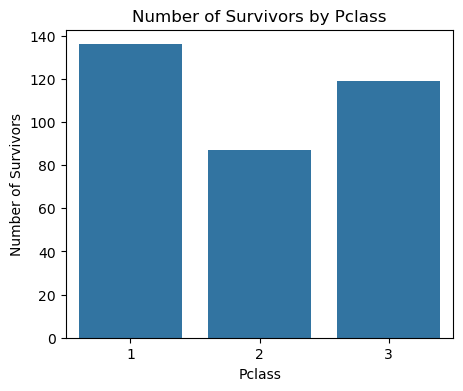

In [17]:
plt.figure(figsize=(5,4))
sns.barplot(x=Pclass_with_Survived.index,y=Pclass_with_Survived.values)
plt.title('Number of Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')
plt.show()


**Conclusion:**

The higher the class, the greater the chance of survival.
Passengers in first class were closest to the lifeboats and a greater percentage were rescued.

In [18]:
Sex_with_Survived=file.groupby('Sex')['Survived'].sum()
Sex_with_Survived

Sex
female    233
male      109
Name: Survived, dtype: int64

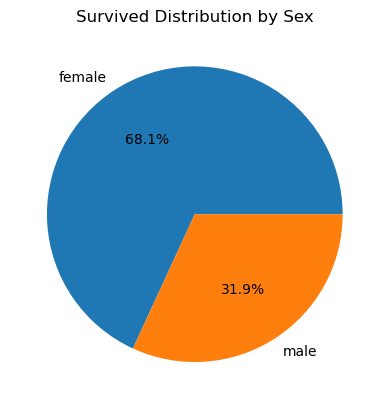

In [19]:
plt.pie(x=Sex_with_Survived.values,labels=Sex_with_Survived.index,data=file,autopct='%.1f%%')
plt.title('Survived Distribution by Sex')
plt.show()



**Conclusion**:

There is a strong relationship between gender and the likelihood of survival:
Women had a significantly higher chance of survival than men.

In [20]:
Embarked_with_Survived=file.groupby('Embarked')['Survived'].sum()
Embarked_with_Survived

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

**Conclusion:**
The survival rate was linked to the port from which the passengers departed, as the port was an indicator of the passengers' social status and economic class, which in turn directly affected their chances of survival during the accident.

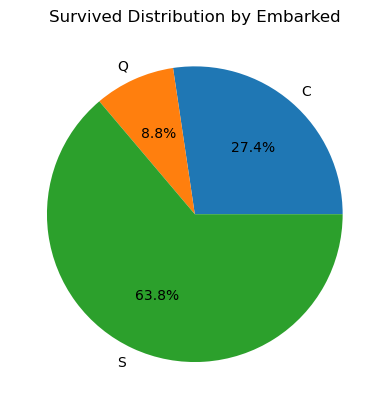

In [21]:
plt.pie(x=Embarked_with_Survived.values,labels=Embarked_with_Survived.index,data=file,autopct='%.1f%%')
plt.title('Survived Distribution by Embarked')
plt.show()

In [22]:
Embarked_with_Fare=file.groupby('Embarked')['Fare'].mean()
Embarked_with_Fare

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [23]:
file['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Insight:**

The greater the passenger's wealth (represented by the port and average fare), the greater their chance of survival.
The port at which passengers embarked was an indicator of their social status, which in turn influenced their accommodation on the ship and their chances of survival.

In [24]:
SibSp_with_Survived=file.groupby('SibSp')['Survived'].sum()
SibSp_with_Survived

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

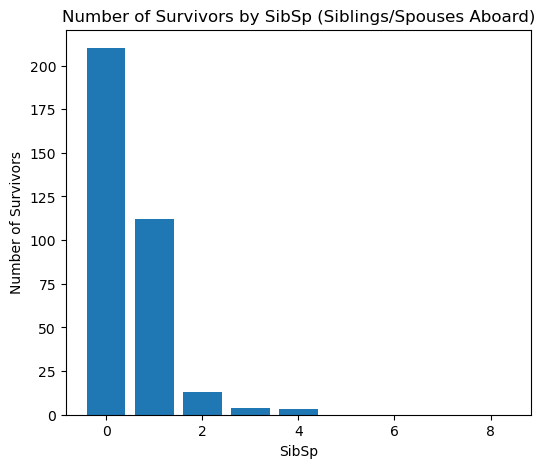

In [25]:
plt.figure(figsize=(6,5))
plt.bar(SibSp_with_Survived.index, SibSp_with_Survived.values)

plt.title('Number of Survivors by SibSp (Siblings/Spouses Aboard)')
plt.xlabel('SibSp')
plt.ylabel('Number of Survivors')
plt.show()



**Insight:**

Having a large number of family members on board reduced the chance of survival.
Passengers with only one other person on board appeared to have the best chance of survival,
while larger families had difficulty surviving together.

In [26]:
Parch_with_Survived=file.groupby('Parch')['Survived'].sum()
Parch_with_Survived

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

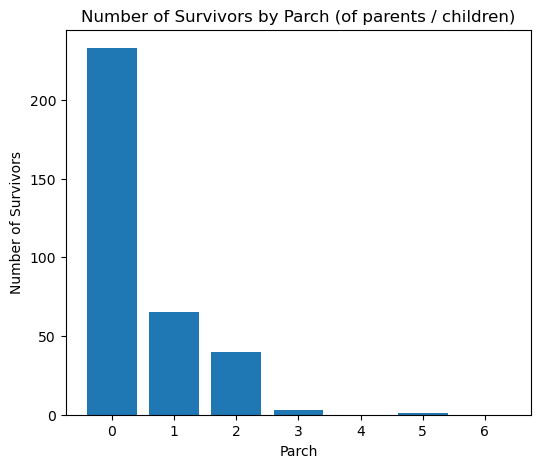

In [27]:
plt.figure(figsize=(6,5))
plt.bar(Parch_with_Survived.index, Parch_with_Survived.values)

plt.title('Number of Survivors by Parch (of parents / children)')
plt.xlabel('Parch')
plt.ylabel('Number of Survivors')
plt.show()


**Insight:**

The more family members (parents/children) accompanying a passenger, the lower the chance of survival.
Passengers with only one or two relatives had a higher chance of survival,
while large families had almost no survivors.

---
## --------------------------------------------*The end of EDA*--------------------------------------------------
---
---

## --------------------------------------------Data Preprocessing---------------------------------------------

1- fill null values by mode

In [28]:
file.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [29]:
for col in file[['Age','Cabin','Embarked']]:
    file[col].fillna(value=file[col].mode()[0],inplace=True)

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_26556\660203431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file[col].fillna(value=file[col].mode()[0],inplace=True)


In [30]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [31]:
file.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Skwed ,false values and Outliers in [Age , Fare]

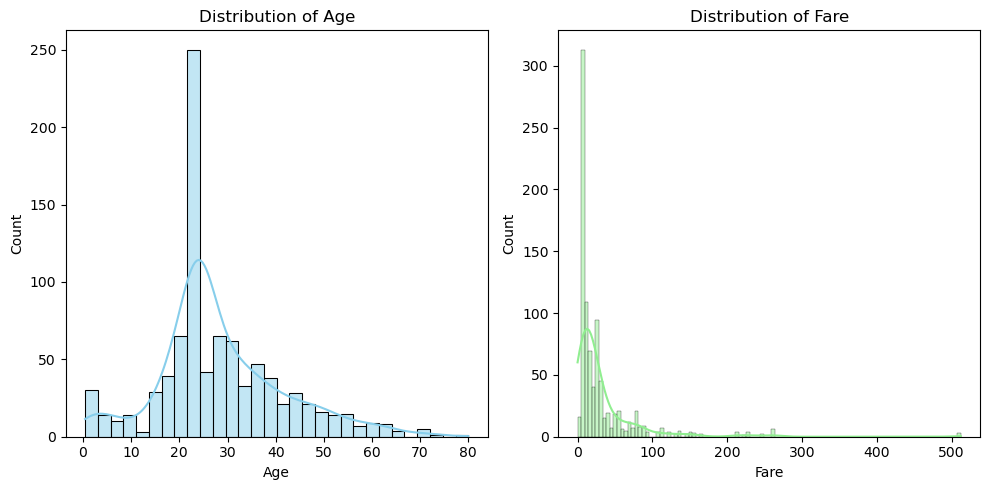

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)   
sns.histplot(data=file, x='Age', kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(data=file, x='Fare', kde=True, color='lightgreen')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


2- dealing with skweness by Replace it with limits

In [33]:
Age_lower_pound = file['Age'].quantile(0.25)
Age_upper_pound = file['Age'].quantile(0.75)
Age_iqr = Age_upper_pound - Age_lower_pound

Fare_lower_pound = file['Fare'].quantile(0.25)
Fare_upper_pound = file['Fare'].quantile(0.75)
Fare_iqr = Fare_upper_pound - Fare_lower_pound

Age_min = Age_lower_pound - 1.5 * Age_iqr
Age_max = Age_upper_pound + 1.5 * Age_iqr
Fare_min = Fare_lower_pound - 1.5 * Fare_iqr
Fare_max = Fare_upper_pound + 1.5 * Fare_iqr

file['Age'] = np.where(file['Age'] < Age_min, Age_min,np.where(file['Age'] > Age_max, Age_max, file['Age']))

file['Fare'] = np.where(file['Fare'] < Fare_min, Fare_min,np.where(file['Fare'] > Fare_max, Fare_max, file['Fare']))


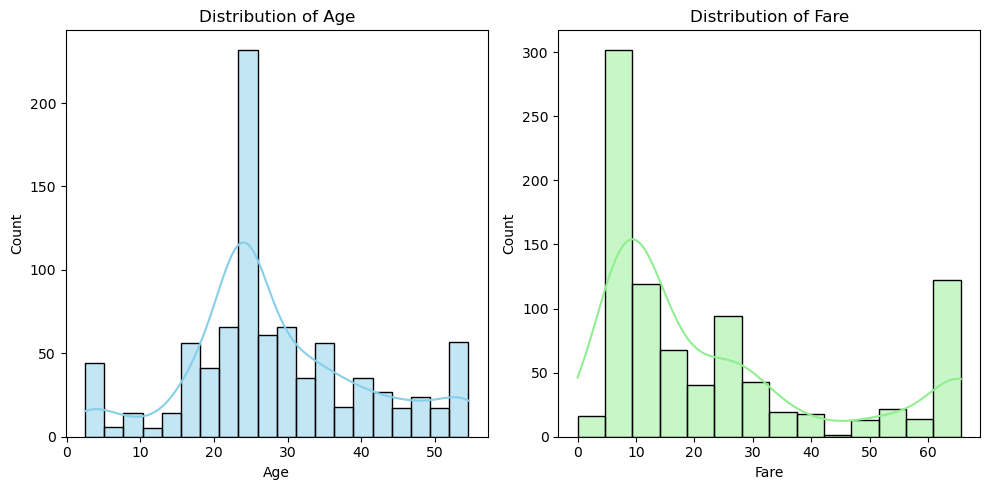

In [34]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)   
sns.histplot(data=file, x='Age', kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(data=file, x='Fare', kde=True, color='lightgreen')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
    


3- Encode some features

In [35]:
file['Sex']=file['Sex'].map({'male':1,'female':0})

In [36]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_col = encoder.fit_transform(file[['Embarked']])
encoded_col = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out(['Embarked']))

file = pd.concat([file, encoded_col], axis=1)
file.drop('Embarked', axis=1, inplace=True)


In [37]:
file.drop(labels=['Cabin'],axis=1,inplace=True)
file.drop(labels=['Ticket'],axis=1,inplace=True)

4- Scale features

In [38]:
scaler=StandardScaler()
file[['Age','Fare']]=scaler.fit_transform(file[['Age','Fare']])


---
## ---------------------------------------The End Of Data Preprocessing--------------------------------------
---

## ------------------------------------------------**Use ML Model**----------------------------------------------


1- define feayures and labels

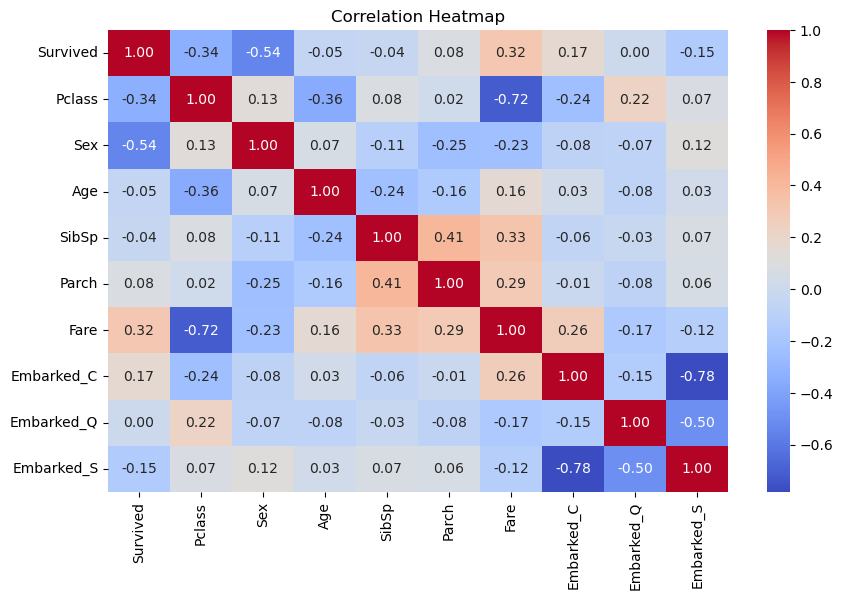

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(file.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [40]:
label=file['Survived']
features=file.drop(labels='Survived',axis=1)

2- Split data

In [41]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=.2,random_state=42)

3- Scale x_train and x_test

In [42]:
x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)

4- Use Logistic Regression Model

In [43]:
LR_model=LogisticRegression()

LR_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
LR_model_predictions=LR_model.predict(x_test)

In [45]:
conf_matrix=confusion_matrix(y_test,LR_model_predictions)

print("Confusion Matrix:\n",conf_matrix)

print("\nClassification Report:\n",classification_report(y_test,LR_model_predictions))



Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



5- Use SVC

In [46]:
svc_model=SVC(kernel='rbf',C=300,gamma=0.04, class_weight='balanced')

svc_model.fit(x_train,y_train)

svc_model_predictions=svc_model.predict(x_test)

conf_matrix=confusion_matrix(y_test,svc_model_predictions)

print("Confusion Matrix:\n",conf_matrix)

print("\nClassification Report:\n",classification_report(y_test,svc_model_predictions))

Confusion Matrix:
 [[89 16]
 [14 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

